In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data/data_set_and_label_sizes.csv").drop(columns="Unnamed: 0")
data = data.assign(task=lambda df: df["task"].str.replace("_", " "))
data

,class,task,dataset,size
0,positive,relevance scoring,train,126.0
1,positive,relevance scoring,test,38.0
2,positive,relevance scoring,validation,NaN
3,positive,key date extraction,train,82.0
4,positive,key date extraction,test,27.0
5,positive,key date extraction,validation,NaN
6,positive,key count extraction,train,257.0
7,positive,key count extraction,test,98.0
8,positive,key count extraction,validation,NaN
9,positive,relevance scoring CNN,train,67.0


In [3]:
key_extraction = data.query("task.str.startswith('key')").dropna()
key_extraction

,class,task,dataset,size
3,positive,key date extraction,train,82.0
4,positive,key date extraction,test,27.0
6,positive,key count extraction,train,257.0
7,positive,key count extraction,test,98.0
15,negative,key date extraction,train,161.0
16,negative,key date extraction,test,54.0
18,negative,key count extraction,train,2629.0
19,negative,key count extraction,test,865.0


In [4]:
relevance_scoring = data.query("task.str.startswith('relevance scoring')").dropna()
relevance_scoring

,class,task,dataset,size
0,positive,relevance scoring,train,126.0
1,positive,relevance scoring,test,38.0
9,positive,relevance scoring CNN,train,67.0
10,positive,relevance scoring CNN,test,42.0
11,positive,relevance scoring CNN,validation,55.0
12,negative,relevance scoring,train,2301.0
13,negative,relevance scoring,test,771.0
21,negative,relevance scoring CNN,train,1874.0
22,negative,relevance scoring CNN,test,606.0
23,negative,relevance scoring CNN,validation,592.0


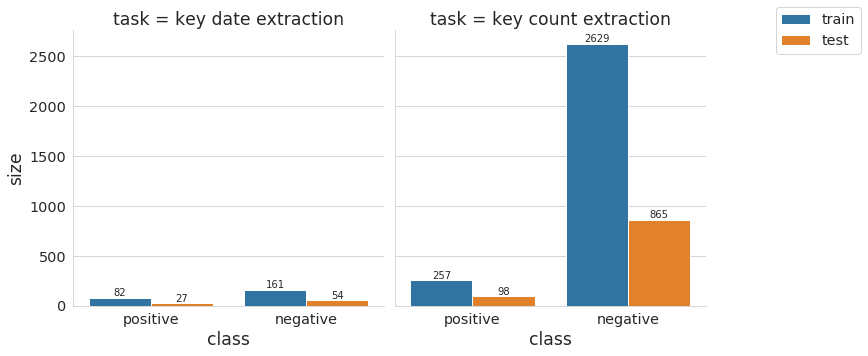

In [5]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 15
            if pd.notna(p.get_height()):
                value = str(int(p.get_height()))
                ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

def dataset_plot(data):
    plt.rcParams["axes.labelsize"] = "xx-large"
    plt.rcParams["xtick.labelsize"] = "x-large"
    plt.rcParams["ytick.labelsize"] = "x-large"
    
    with sns.axes_style("whitegrid"):
        g = sns.catplot(col="task", x="class", y="size", hue="dataset", kind="bar", col_wrap=2, ci=None, data=data, legend=False)
        plt.legend(bbox_to_anchor=(1.5, 1), loc="center right", borderaxespad=0., fontsize="x-large")
        show_values_on_bars(g.axes)
        return g

plot = dataset_plot(key_extraction)
plot.savefig("data_set_and_label_sizes_key_extraction.png")
plot

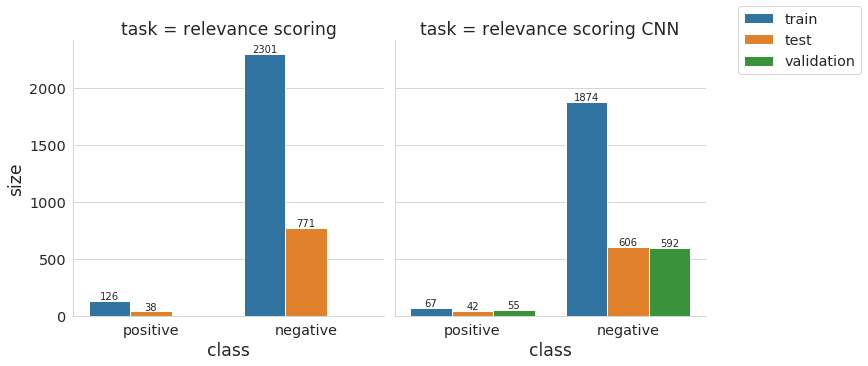

In [6]:
plot = dataset_plot(relevance_scoring)
plot.savefig("data_set_and_label_sizes_relevance_scoring.png")
plot